### **Importing Library**

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### **Classification**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Memilih fitur yang akan digunakan dan target
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Membagi dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing untuk fitur numerik
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing untuk fitur kategorikal
categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Menggabungkan preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Membuat pipeline akhir dengan model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Melatih model
pipeline.fit(X_train, y_train)

# Melakukan prediksi
y_pred = pipeline.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



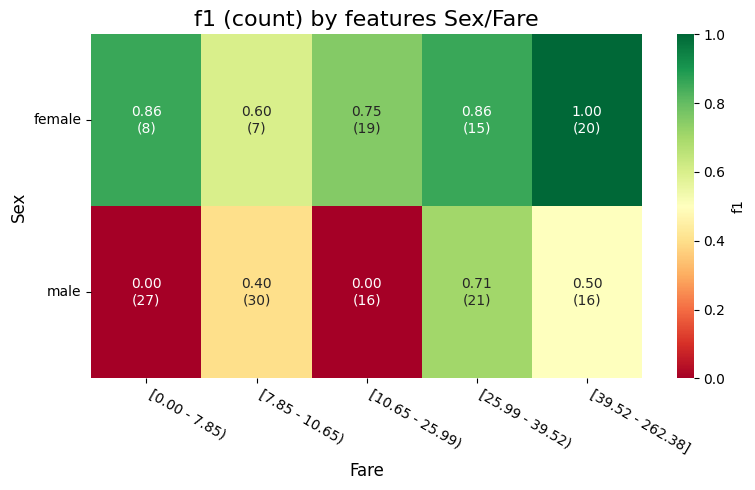

In [3]:
from SegmentPerformance import * 

# Compile data test
test_df = X_test.copy()
test_df['Survived'] = y_test

# Definisikan class
test = SegmentPerformanceTest(
    feature_1='Sex', feature_2='Fare', 
    alternative_scorer='f1',
    max_segments=5, 
    max_cat_proportions=0.8,
)
# Run test
test.run(estimator=pipeline, data=test_df, target_label='Survived')

### **Regression**

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Memuat dataset housing dari seaborn
df = sns.load_dataset('mpg',).dropna()

# Memilih fitur yang relevan dan target
X = df[['horsepower', 'weight', 'acceleration', 'origin']]
y = df['mpg']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline untuk pre-processing
numeric_features = ['horsepower', 'weight', 'acceleration']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['origin']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Menggabungkan preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Membuat pipeline lengkap dengan model regresi
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Melatih model
pipeline.fit(X_train, y_train)

# Memprediksi dan mengevaluasi model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 17.681780385323595
R^2 Score: 0.6535740921645036


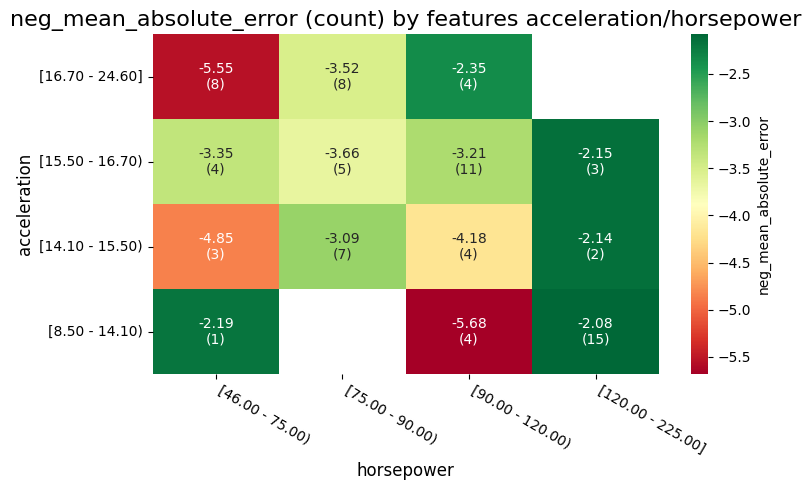

In [5]:
from SegmentPerformance import * 

# Compile data test
test_df = X_test.copy()
test_df['mpg'] = y_test

# Definisikan class
test = SegmentPerformanceTest(
    feature_1='acceleration', feature_2='horsepower', 
    alternative_scorer='neg_mean_absolute_error',
    max_segments=4, 
    max_cat_proportions=0.9
)
# Run test
test.run(estimator=pipeline, data=test_df, target_label='mpg')